In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Train.csv')
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

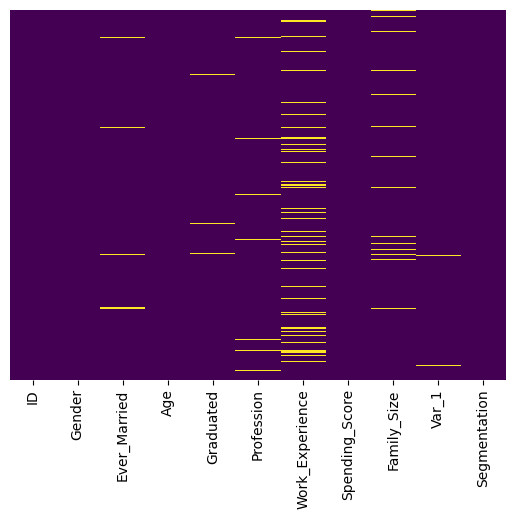

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

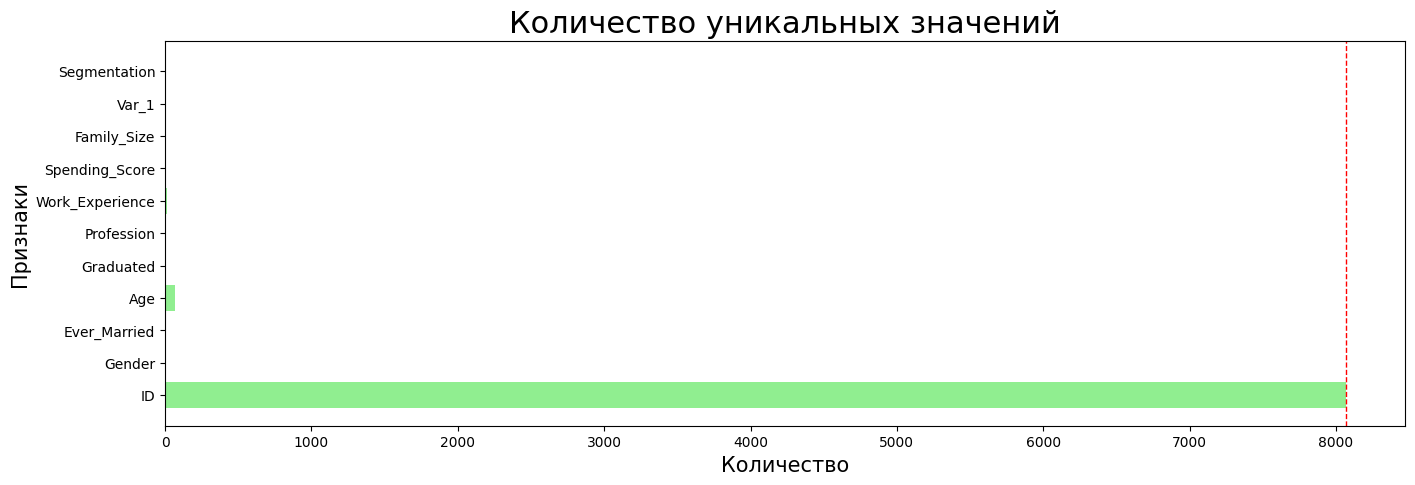

In [ ]:
fig = plt.figure(figsize=(16,5))
ax=fig.subplots() 
ax.axvline(x=data.shape[0], color='r', label='Average', linestyle='--', linewidth=1)
plt.barh(data.columns, data.nunique(), align='center',color='lightgreen')
plt.title("Количество уникальных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.show()

<ipython-input-381-49b5c7c8ca62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


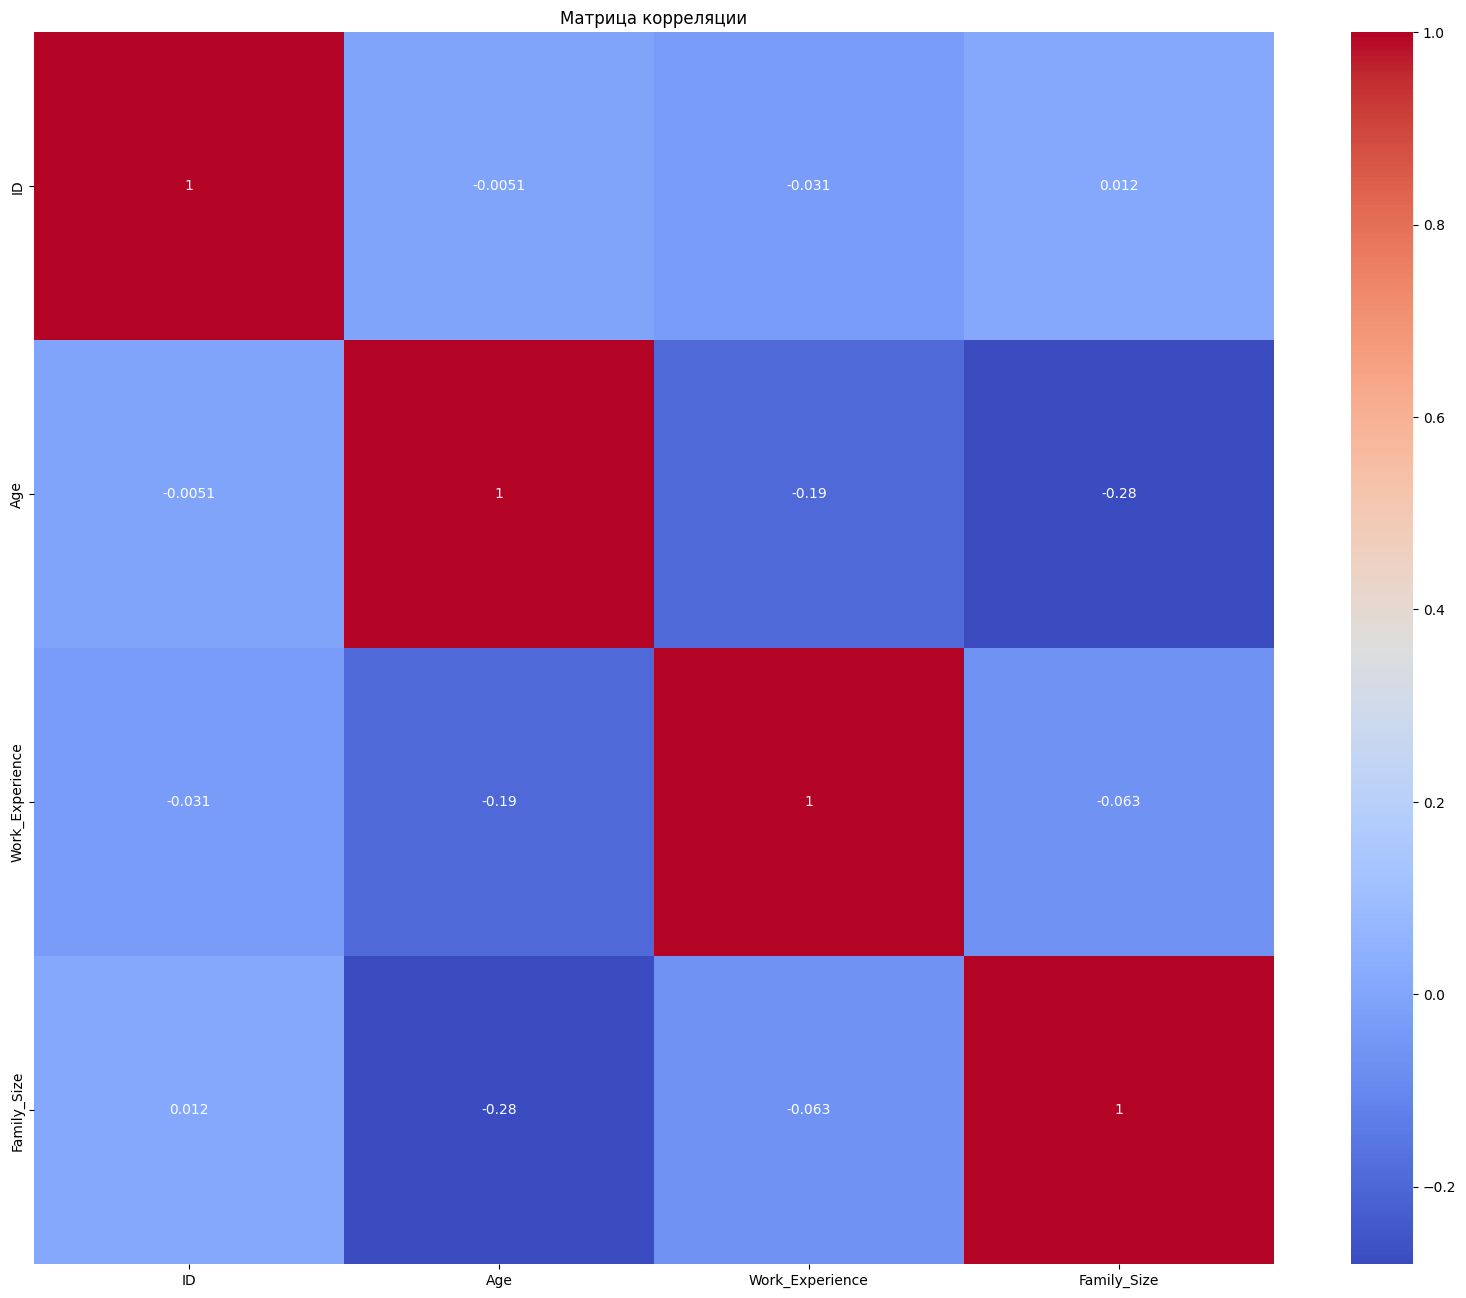

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(training_set.dtype) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

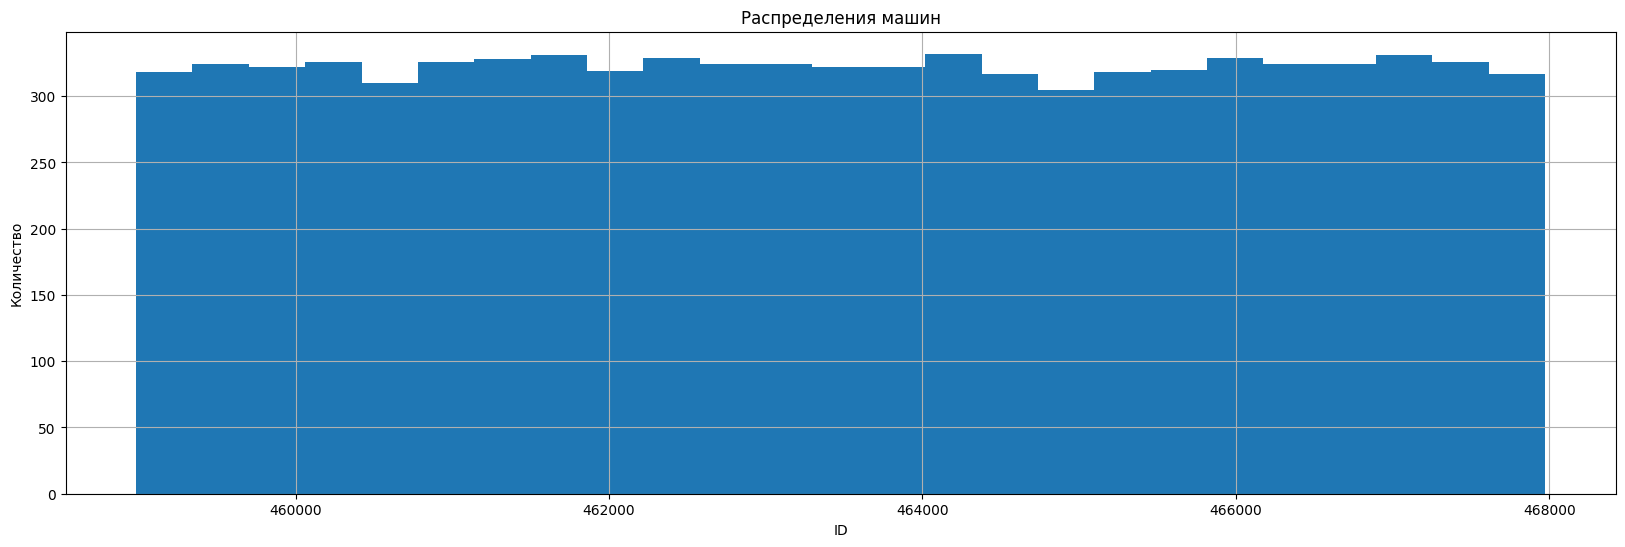

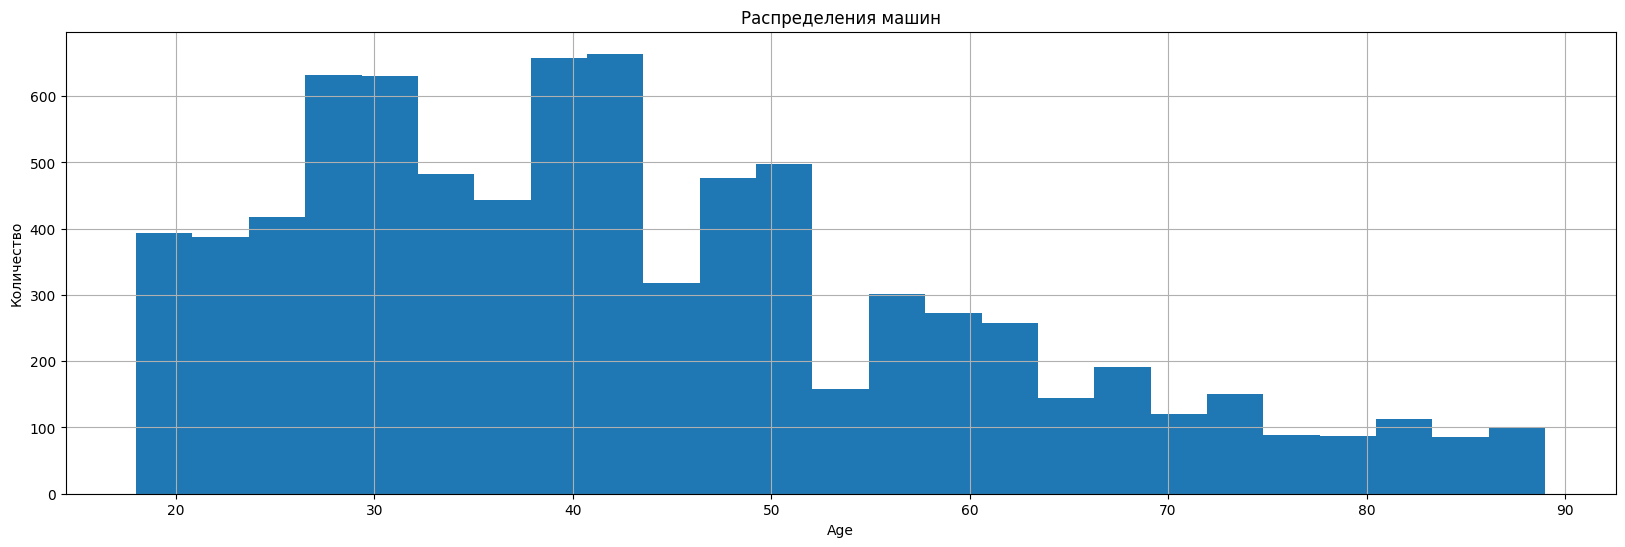

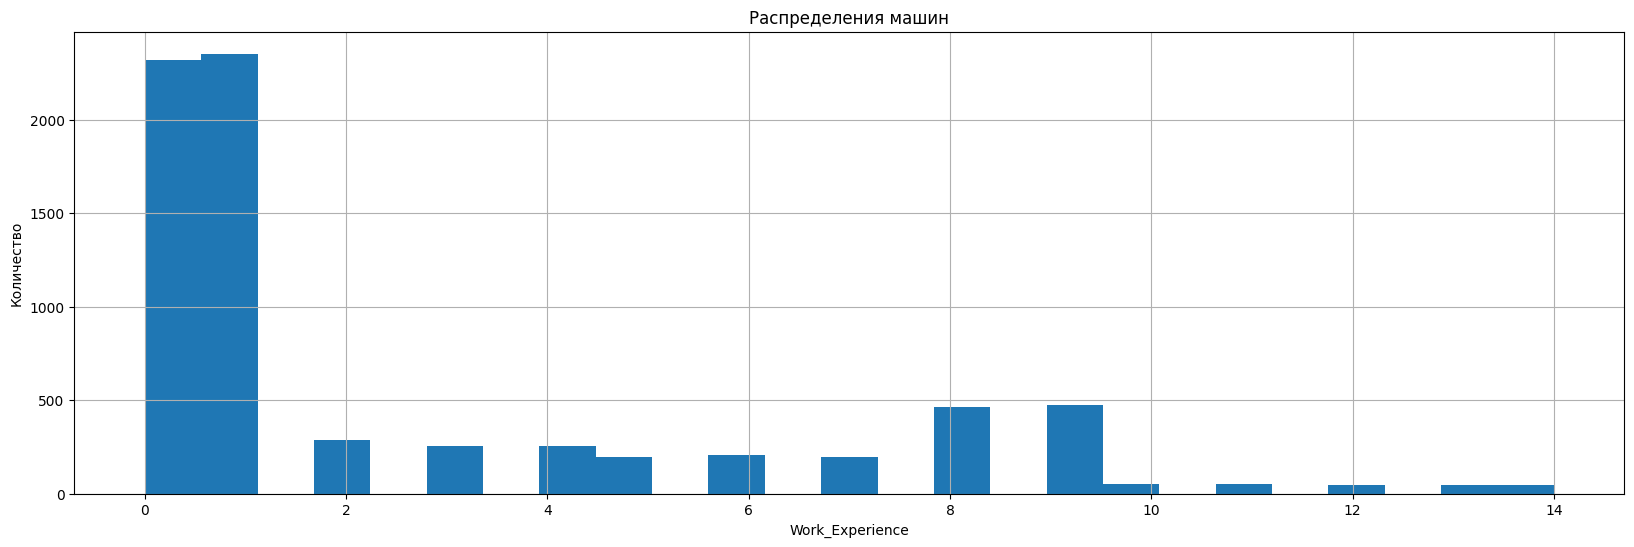

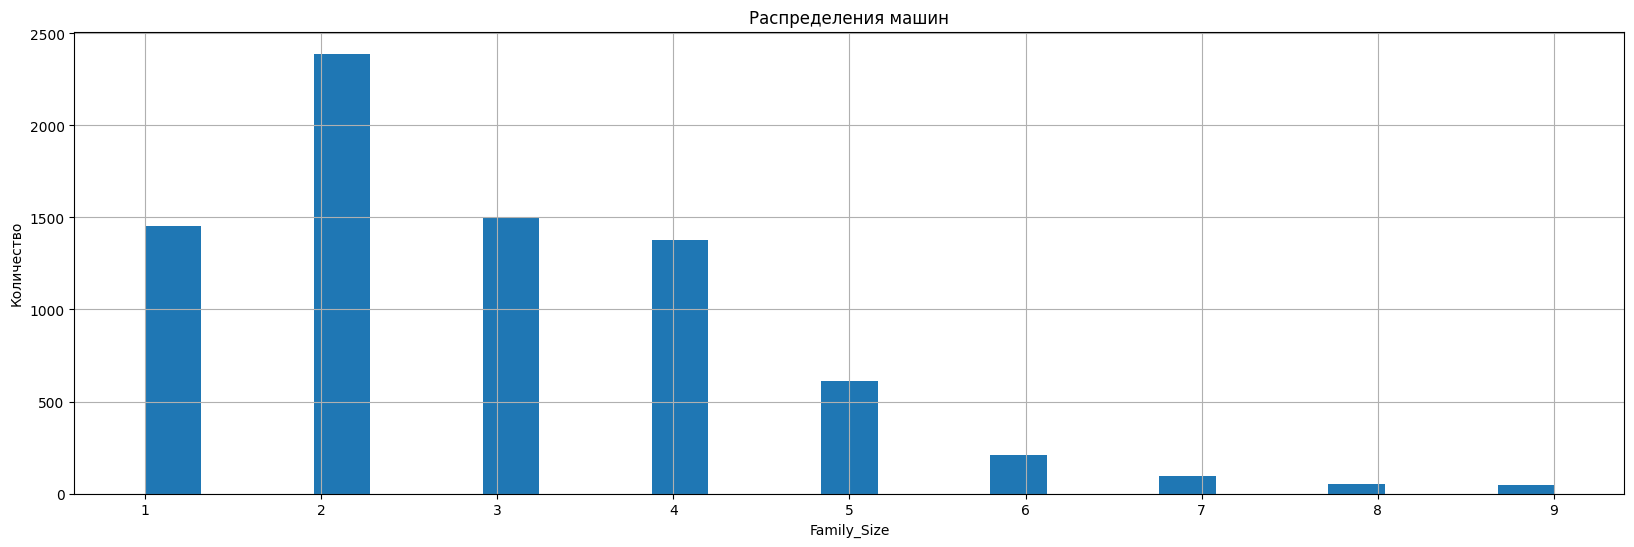

In [ ]:
for i in data.columns:
    if data[i].dtype!='object':
        custom_hist(data[i], 'Распределения машин', i, bins=25)

In [ ]:
def info(column):
    plt.title(str(column))
    sns.barplot(x=data[column].value_counts().index, y=data[column].value_counts())
    plt.show()

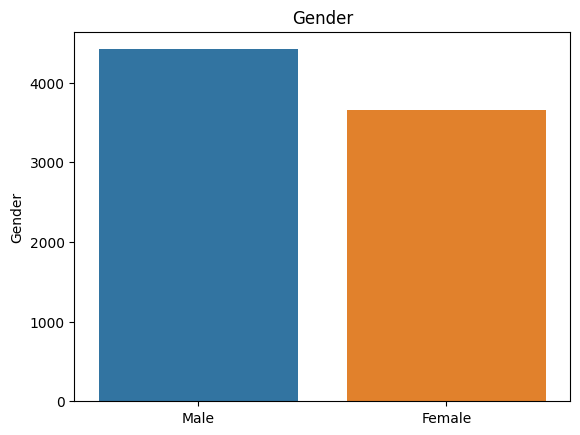

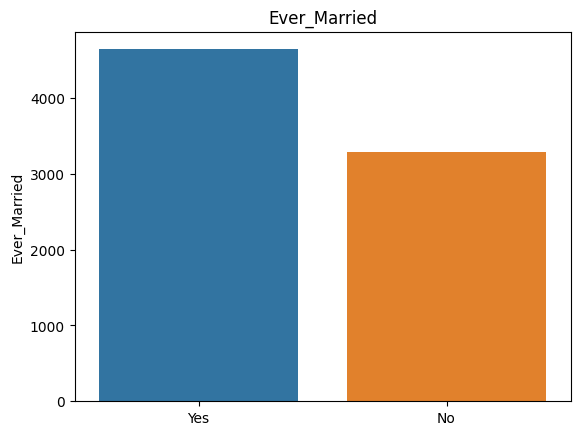

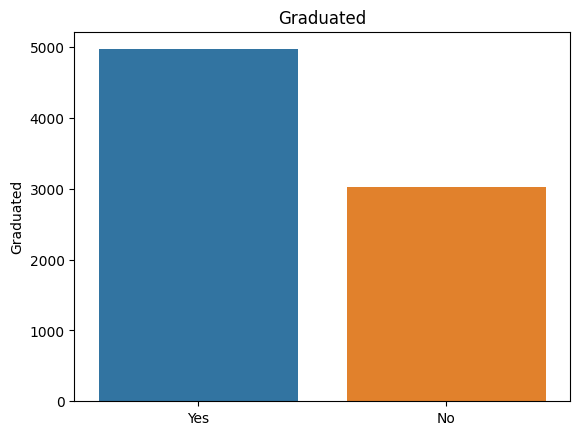

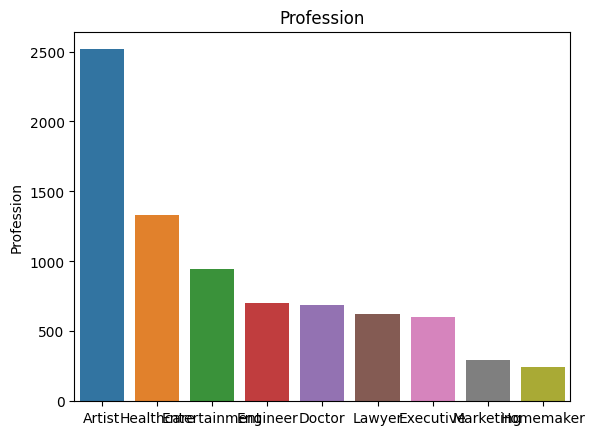

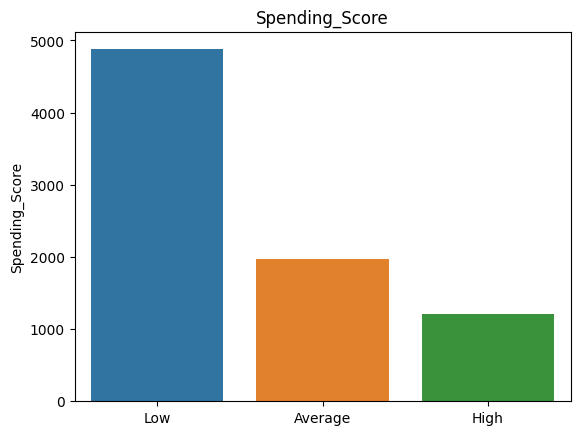

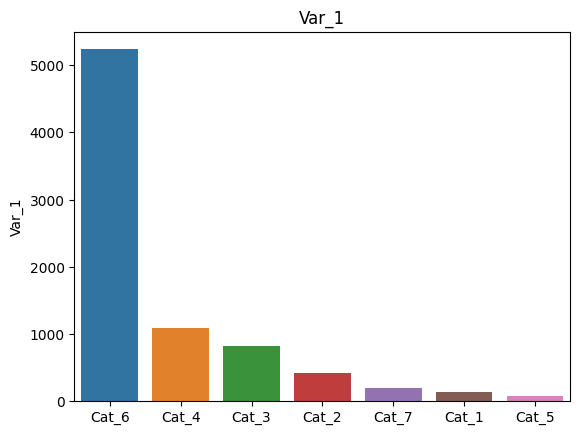

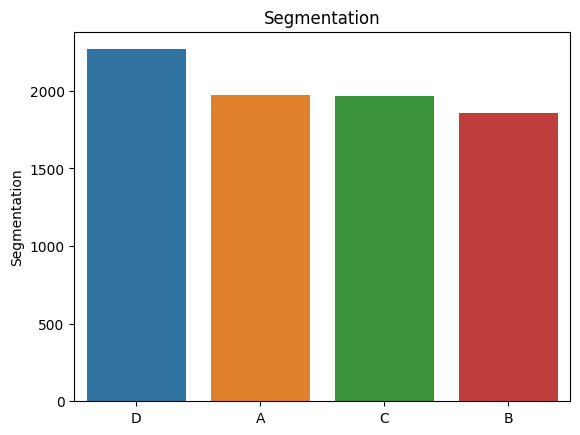

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        info(column)

In [ ]:
data = data.drop('ID', axis=1)

In [ ]:
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ohe = OneHotEncoder()

for i in data.columns:
    if data[i].dtype == 'object' and i !='Segmentation':
        data[i] = data[i].fillna('null')
        transformed = ohe.fit_transform(data[[i]])
        data[ohe.categories_[0]] = transformed.toarray()
        data = data.drop(i, axis = 1)
data

,Age,Work_Experience,Family_Size,Segmentation,Female,Male,No,Yes,null,Artist,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,22,1.0,4.0,D,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,NaN,3.0,A,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67,1.0,1.0,B,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67,0.0,2.0,B,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40,NaN,6.0,A,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,D,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,35,3.0,4.0,D,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,33,1.0,1.0,D,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,27,1.0,4.0,B,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data = data.fillna(-1000000)

In [ ]:
def replace(row):
    class_dictionary = {"A": 1, "B": 2, "C": 3, "D": 4}
    return class_dictionary[row]

In [ ]:
data['Segmentation'] = data['Segmentation'].map(replace)

In [ ]:
data

,Age,Work_Experience,Family_Size,Segmentation,Female,Male,No,Yes,null,Artist,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,22,1.0,4.0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,-1000000.0,3.0,1,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67,1.0,1.0,2,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67,0.0,2.0,2,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40,-1000000.0,6.0,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,35,3.0,4.0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,33,1.0,1.0,4,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,27,1.0,4.0,2,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = data.drop('Segmentation', axis = 1)
y = data['Segmentation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
def compare_models(models, X_train, X_test, y_train, y_test):
    for model in models:
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"------------------------")
        print(f"MODEL: {str(model)}")
        print(f"ClREP: {classification_report(y_test, y_pred)}")
        print(f"CVS:   {cross_val_score(model, X_train, y_train, cv=5)}")
        print(f"Переобучение: {f1_score(y_train, model.predict(X_train), average='macro')} на {f1_score(y_test, y_pred, average='macro')}")
        print(f"------------------------")
models = [GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression()]

In [ ]:
compare_models(models, X_train, X_test, y_train, y_test)

------------------------
MODEL: GradientBoostingClassifier()
ClREP:               precision    recall  f1-score   support

           1       0.45      0.38      0.41      1599
           2       0.36      0.32      0.34      1482
           3       0.53      0.56      0.54      1553
           4       0.61      0.73      0.67      1821

    accuracy                           0.51      6455
   macro avg       0.49      0.50      0.49      6455
weighted avg       0.49      0.51      0.50      6455

CVS:   [0.55727554 0.55417957 0.46439628 0.5        0.46583851]
Переобучение: 0.6780230810675769 на 0.48863023396390015
------------------------
------------------------
MODEL: RandomForestClassifier()
ClREP:               precision    recall  f1-score   support

           1       0.40      0.38      0.39      1599
           2       0.34      0.31      0.32      1482
           3       0.50      0.48      0.49      1553
           4       0.60      0.68      0.64      1821

    accuracy    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gs = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid={'n_estimators': [100, 1000]})
gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [100, 1000]})

In [ ]:
gs.best_params_

{'n_estimators': 100}

In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.727617,0.009352,0.004255,0.000112,100,{'n_estimators': 100},0.557276,0.557276,0.467492,0.496894,0.462733,0.508334,0.041639,1
1,7.531310,0.220746,0.023226,0.001359,1000,{'n_estimators': 1000},0.541796,0.538700,0.445820,0.484472,0.456522,0.493462,0.040244,2


In [ ]:
gs2 = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [100, 80, 120]})
gs2.fit(X_train, y_train)
print(gs.best_params_)
pd.DataFrame(gs.cv_results_)

{'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.727617,0.009352,0.004255,0.000112,100,{'n_estimators': 100},0.557276,0.557276,0.467492,0.496894,0.462733,0.508334,0.041639,1
1,7.531310,0.220746,0.023226,0.001359,1000,{'n_estimators': 1000},0.541796,0.538700,0.445820,0.484472,0.456522,0.493462,0.040244,2


In [ ]:
model = GradientBoostingClassifier()
model.fit(X, y)
model2 = RandomForestClassifier()
model2.fit(X, y)

RandomForestClassifier()

In [ ]:
data_test = pd.read_csv('Test.csv')
data_test = data_test.drop('ID', axis =1 )
data_test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [ ]:
ohe = OneHotEncoder()

for i in data_test.columns:
    if data_test[i].dtype == 'object' and i !='Segmentation':
        data_test[i] = data_test[i].fillna('null')
        transformed = ohe.fit_transform(data_test[[i]])
        data_test[ohe.categories_[0]] = transformed.toarray()
        data_test = data_test.drop(i, axis = 1)
data_test = data_test.fillna(-1000000)
data_test

,Age,Work_Experience,Family_Size,Segmentation,Female,Male,No,Yes,null,Artist,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,36,0.0,1.0,B,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37,8.0,4.0,A,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69,0.0,1.0,A,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,59,11.0,2.0,B,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,19,-1000000.0,4.0,A,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,29,9.0,4.0,B,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2623,35,1.0,1.0,A,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2624,53,-1000000.0,2.0,C,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2625,47,1.0,5.0,C,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
def replace(row):
    class_dictionary = {"A": 1, "B": 2, "C": 3, "D": 4}
    return class_dictionary[row]

In [ ]:
data_test['Segmentation'] = data_test['Segmentation'].map(replace)

In [ ]:
X = data_test.drop('Segmentation', axis = 1)
y = data_test['Segmentation']

In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           1       0.35      0.28      0.31       846
           2       0.25      0.25      0.25       550
           3       0.26      0.33      0.29       472
           4       0.42      0.46      0.44       759

    accuracy                           0.33      2627
   macro avg       0.32      0.33      0.32      2627
weighted avg       0.34      0.33      0.33      2627



In [ ]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           1       0.37      0.28      0.32       846
           2       0.22      0.23      0.23       550
           3       0.25      0.34      0.29       472
           4       0.41      0.43      0.42       759

    accuracy                           0.32      2627
   macro avg       0.32      0.32      0.31      2627
weighted avg       0.33      0.32      0.32      2627

